In [3]:
# Install required packages (uncomment and run if needed)
!pip install opencv-python mediapipe numpy matplotlib

print("📦 If you need to install packages, uncomment the line above and run this cell first!")
print("📹 Make sure your webcam is connected and working!")
print("✅ Ready to start building our computer vision game!")

INFO: pip is looking at multiple versions of mediapipe to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 22.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.


📦 If you need to install packages, uncomment the line above and run this cell first!
📹 Make sure your webcam is connected and working!
✅ Ready to start building our computer vision game!


In [5]:
import cv2
import mediapipe as mp
import random
import numpy as np
from collections import deque
import statistics as st
import matplotlib.pyplot as plt

print("✅ All libraries imported successfully!")
print("📷 OpenCV version:", cv2.__version__)
print("🤖 MediaPipe is ready for hand detection!")
print("🚀 Ready to build our computer vision game!")

✅ All libraries imported successfully!
📷 OpenCV version: 4.12.0
🤖 MediaPipe is ready for hand detection!
🚀 Ready to build our computer vision game!


In [6]:
def calculate_winner(cpu_choice, player_choice):
    """
    Determine the winner of each round

    Args:
        cpu_choice: Computer's move ("Rock", "Paper", "Scissors")
        player_choice: Player's detected move

    Returns:
        String indicating the result ("You win!", "CPU wins!", "Tie!", "Invalid!")
    """

    # Handle invalid moves
    if player_choice == "Invalid":
        return "Invalid!"

    # Check for tie
    if player_choice == cpu_choice:
        return "Tie!"

    # Player wins scenarios
    elif player_choice == "Rock" and cpu_choice == "Scissors":
        return "You win!"
    elif player_choice == "Scissors" and cpu_choice == "Paper":
        return "You win!"
    elif player_choice == "Paper" and cpu_choice == "Rock":
        return "You win!"

    # CPU wins scenarios (everything else)
    else:
        return "CPU wins!"

# Test our game logic!
print("🧠 Testing Game Logic:")
print("=" * 30)

test_cases = [
    ("Rock", "Scissors", "🗿 vs ✂️"),
    ("Paper", "Rock", "📄 vs 🗿"),
    ("Scissors", "Paper", "✂️ vs 📄"),
    ("Rock", "Rock", "🗿 vs 🗿"),
    ("Paper", "Invalid", "📄 vs ❌")
]

for player, cpu, symbols in test_cases:
    result = calculate_winner(cpu, player)
    print(f"{symbols} → {result}")

print("\n✅ Game logic is working perfectly!")
print("🎮 Ready to add computer vision!")

🧠 Testing Game Logic:
🗿 vs ✂️ → You win!
📄 vs 🗿 → You win!
✂️ vs 📄 → You win!
🗿 vs 🗿 → Tie!
📄 vs ❌ → CPU wins!

✅ Game logic is working perfectly!
🎮 Ready to add computer vision!


In [7]:
def compute_fingers(hand_landmarks, count=0):
    """
    Count how many fingers are extended

    This function analyzes hand landmarks to determine finger positions.
    It compares fingertip positions with finger base positions.

    Args:
        hand_landmarks: List of hand landmark points with coordinates
        count: Starting count (usually 0)

    Returns:
        Total number of extended fingers
    """

    # Index Finger (landmark 8 = tip, landmark 6 = middle joint)
    if hand_landmarks[8][2] < hand_landmarks[6][2]:  # Tip above middle joint
        count += 1

    # Middle Finger (landmark 12 = tip, landmark 10 = middle joint)
    if hand_landmarks[12][2] < hand_landmarks[10][2]:
        count += 1

    # Ring Finger (landmark 16 = tip, landmark 14 = middle joint)
    if hand_landmarks[16][2] < hand_landmarks[14][2]:
        count += 1

    # Pinky Finger (landmark 20 = tip, landmark 18 = middle joint)
    if hand_landmarks[20][2] < hand_landmarks[18][2]:
        count += 1

    # Thumb (different logic - depends on left/right hand)
    # Landmark 4 = thumb tip, landmark 3 = thumb joint
    if hand_landmarks[4][3] == "Left" and hand_landmarks[4][1] > hand_landmarks[3][1]:
        count += 1  # For left hand, thumb tip is to the right of joint
    elif hand_landmarks[4][3] == "Right" and hand_landmarks[4][1] < hand_landmarks[3][1]:
        count += 1  # For right hand, thumb tip is to the left of joint

    return count

# Let's understand the gesture mapping
gesture_mapping = {
    0: "🗿 Rock (closed fist)",
    1: "❌ Invalid gesture",
    2: "✂️ Scissors (peace sign)",
    3: "❌ Invalid gesture",
    4: "❌ Invalid gesture",
    5: "📄 Paper (open hand)"
}

print("🤖 Hand Detection System Ready!")
print("📋 Gesture Mapping:")
print("=" * 30)
for fingers, gesture in gesture_mapping.items():
    print(f"{fingers} fingers → {gesture}")

print("\n✅ Finger counting algorithm loaded!")
print("🎯 Now we can detect Rock, Paper, Scissors gestures!")

🤖 Hand Detection System Ready!
📋 Gesture Mapping:
0 fingers → 🗿 Rock (closed fist)
1 fingers → ❌ Invalid gesture
2 fingers → ✂️ Scissors (peace sign)
3 fingers → ❌ Invalid gesture
4 fingers → ❌ Invalid gesture
5 fingers → 📄 Paper (open hand)

✅ Finger counting algorithm loaded!
🎯 Now we can detect Rock, Paper, Scissors gestures!


In [8]:
# Test camera functionality
def test_camera():
    """
    Simple camera test to make sure everything works
    Press ESC to close the window
    """
    print("🎥 Starting camera test...")
    print("📹 Look for the camera window that opens")
    print("⌨️  Press ESC to close the camera")

    # Initialize camera
    webcam = cv2.VideoCapture(0)

    if not webcam.isOpened():
        print("❌ Error: Cannot access webcam!")
        print("💡 Make sure your camera is connected and not being used by another app")
        return False

    print("✅ Camera opened successfully!")
    print("🎯 You should see a window with your camera feed")

    while True:
        # Read frame from camera
        success, frame = webcam.read()

        if not success:
            print("❌ Failed to read from camera")
            break

        # Flip image horizontally (mirror effect)
        frame = cv2.flip(frame, 1)

        # Add instructions text to the frame
        cv2.putText(frame, "Camera Test - Press ESC to close",
                   (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        cv2.putText(frame, "If you can see this, your camera works!",
                   (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # Show the frame
        cv2.imshow('Camera Test', frame)

        # Check for ESC key press (27 is ESC key code)
        if cv2.waitKey(1) & 0xFF == 27:
            break

    # Clean up
    webcam.release()
    cv2.destroyAllWindows()
    print("✅ Camera test completed!")
    return True

# Uncomment the line below to test your camera
# test_camera()

print("📹 Camera test function ready!")
print("💡 Uncomment the 'test_camera()' line above to test your webcam")
print("🎯 Once your camera works, we'll add hand detection!")

📹 Camera test function ready!
💡 Uncomment the 'test_camera()' line above to test your webcam
🎯 Once your camera works, we'll add hand detection!


In [9]:
def real_life_rock_paper_scissors():
    """
    Real-life style Rock-Paper-Scissors with countdown and simultaneous reveal
    Uses full camera feed without cropping and displays game info in a separate window
    """

    print("🎮 Real-Life Rock-Paper-Scissors Starting!")
    print("👊 Show a FIST to start the countdown")
    print("🎯 After '3-2-1', show your final choice!")
    print("⌨️  Press ESC to quit")

    # Initialize MediaPipe
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_hands = mp.solutions.hands

    webcam = cv2.VideoCapture(0)
    if not webcam.isOpened():
        print("❌ Cannot access camera!")
        return

    # Game state
    cpu_choices = ["Rock", "Paper", "Scissors"]
    player_score = 0
    cpu_score = 0

    # Game phases
    WAITING_FOR_FIST = "waiting"
    COUNTING_DOWN = "countdown"
    REVEALING = "reveal"
    SHOWING_RESULT = "result"

    game_phase = WAITING_FOR_FIST
    countdown_timer = 0
    countdown_number = 3
    reveal_timer = 0
    result_timer = 0

    # Choices
    player_choice = "Nothing"
    cpu_choice = "Nothing"
    winner = "Show a fist to start!"
    winner_color = (255, 255, 255)

    # Detection settings
    display_values = ["Rock", "Invalid", "Scissors", "Invalid", "Invalid", "Paper"]
    recent_moves = deque(['Nothing'] * 3, maxlen=3)

    # Create info window
    info_window = np.zeros((300, 600, 3), dtype=np.uint8)

    with mp_hands.Hands(
            model_complexity=0,
            min_detection_confidence=0.7,
            min_tracking_confidence=0.7) as hands:

        while webcam.isOpened():
            success, image = webcam.read()
            if not success:
                break

            image = cv2.flip(image, 1)
            h, w, c = image.shape

            # Process with MediaPipe
            image.flags.writeable = False
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = hands.process(image)
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Detect current gesture
            current_move = "Nothing"
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    # Draw landmarks
                    mp_drawing.draw_landmarks(
                        image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style())

                    # Convert landmarks for finger counting
                    landmarks = []
                    for id, lm in enumerate(hand_landmarks.landmark):
                        landmarks.append([id, int(lm.x * w), int(lm.y * h), "Right"])

                    # Count fingers
                    finger_count = compute_fingers(landmarks)
                    if finger_count <= 5:
                        current_move = display_values[finger_count]

            # Add to recent moves for stability
            recent_moves.appendleft(current_move)

            # Use most common move for stability
            try:
                stable_move = st.mode(recent_moves)
            except st.StatisticsError:
                stable_move = "Nothing"

            # Game State Machine
            if game_phase == WAITING_FOR_FIST:
                if stable_move == "Rock":  # Fist detected
                    game_phase = COUNTING_DOWN
                    countdown_timer = 90  # 3 seconds at 30fps
                    countdown_number = 3
                    cpu_choice = random.choice(cpu_choices)  # CPU makes choice now
                    winner = "Get ready..."
                    winner_color = (0, 255, 255)  # Yellow

            elif game_phase == COUNTING_DOWN:
                countdown_timer -= 1

                if countdown_timer <= 0:
                    if countdown_number > 1:
                        countdown_number -= 1
                        countdown_timer = 30  # 1 second for each count
                    else:
                        game_phase = REVEALING
                        reveal_timer = 60  # 2 seconds to show final choices
                        winner = "SHOOT! Show your choice!"
                        winner_color = (0, 255, 0)  # Green

            elif game_phase == REVEALING:
                reveal_timer -= 1
                player_choice = stable_move if stable_move in ["Rock", "Paper", "Scissors"] else "Nothing"

                if reveal_timer <= 0:
                    game_phase = SHOWING_RESULT
                    result_timer = 120  # 4 seconds to show result

                    # Calculate winner
                    if player_choice in ["Rock", "Paper", "Scissors"]:
                        result = calculate_winner(cpu_choice, player_choice)

                        if result == "You win!":
                            player_score += 1
                            winner = f"🎉 YOU WIN! {player_choice} beats {cpu_choice}"
                            winner_color = (0, 255, 0)  # Green
                        elif result == "CPU wins!":
                            cpu_score += 1
                            winner = f"🤖 CPU WINS! {cpu_choice} beats {player_choice}"
                            winner_color = (0, 0, 255)  # Red
                        else:
                            winner = f"🤝 TIE! Both played {player_choice}"
                            winner_color = (255, 255, 0)  # Yellow
                    else:
                        winner = "❌ No valid choice detected!"
                        winner_color = (128, 128, 128)  # Gray

            elif game_phase == SHOWING_RESULT:
                result_timer -= 1

                if result_timer <= 0:
                    game_phase = WAITING_FOR_FIST
                    player_choice = "Nothing"
                    cpu_choice = "Nothing"
                    winner = "Show a fist to play again!"
                    winner_color = (255, 255, 255)  # White

            # Just display minimal info on the webcam feed
            if game_phase == COUNTING_DOWN:
                # Large countdown number
                cv2.putText(image, str(countdown_number), (w//2-30, h//2),
                           cv2.FONT_HERSHEY_DUPLEX, 4, (0, 255, 255), 6)
            elif game_phase == REVEALING:
                cv2.putText(image, "SHOOT!", (w//2-60, h//2),
                           cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 0), 3)

            # Create info window with all game information
            info_window.fill(0)  # Clear the window

            # Game title
            cv2.putText(info_window, "Real-Life Rock Paper Scissors", (10, 30),
                       cv2.FONT_HERSHEY_DUPLEX, 0.8, (255, 255, 255), 1)

            # Score section
            cv2.putText(info_window, "YOU", (50, 80), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255, 100, 0), 2)
            cv2.putText(info_window, str(player_score), (70, 120), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255, 100, 0), 2)

            cv2.putText(info_window, "VS", (280, 100), cv2.FONT_HERSHEY_DUPLEX, 1.5, (255, 255, 255), 2)

            cv2.putText(info_window, "CPU", (450, 80), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 100, 255), 2)
            cv2.putText(info_window, str(cpu_score), (470, 120), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0, 100, 255), 2)

            # Game state
            cv2.line(info_window, (0, 140), (600, 140), (100, 100, 100), 1)

            # Game phase specific displays
            if game_phase == WAITING_FOR_FIST:
                cv2.putText(info_window, "👊 Show FIST to start", (150, 180),
                           cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 1)

            elif game_phase == COUNTING_DOWN:
                cv2.putText(info_window, f"Countdown: {countdown_number}", (150, 180),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
                cv2.putText(info_window, "Get ready...", (200, 220),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 1)

            elif game_phase == REVEALING:
                cv2.putText(info_window, "SHOOT!", (250, 180),
                           cv2.FONT_HERSHEY_DUPLEX, 1, (0, 255, 0), 2)
                cv2.putText(info_window, "Show your choice NOW!", (150, 220),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1)

            elif game_phase == SHOWING_RESULT:
                # Show both choices clearly
                cv2.putText(info_window, f"You: {player_choice}", (50, 180),
                           cv2.FONT_HERSHEY_DUPLEX, 1, (255, 100, 0), 2)
                cv2.putText(info_window, f"CPU: {cpu_choice}", (350, 180),
                           cv2.FONT_HERSHEY_DUPLEX, 1, (0, 100, 255), 2)

            # Winner/status message
            cv2.putText(info_window, winner, (20, 250),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8, winner_color, 2)

            # Instructions
            cv2.putText(info_window, "ESC: Quit", (10, 290),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (180, 180, 180), 1)

            # Your current move
            cv2.putText(info_window, f"Current gesture: {stable_move}", (300, 290),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (180, 180, 180), 1)

            # Show both windows
            cv2.imshow('Game Camera', image)
            cv2.imshow('Game Info', info_window)

            # Handle key presses
            key = cv2.waitKey(1) & 0xFF
            if key == 27:  # ESC
                break

    webcam.release()
    cv2.destroyAllWindows()

    print("🏁 Real-Life Rock-Paper-Scissors completed!")
    print(f"📊 Final Score: You {player_score} - {cpu_score} CPU")
    if player_score > cpu_score:
        print("🏆 YOU WIN THE MATCH!")
    elif cpu_score > player_score:
        print("🤖 CPU WINS THE MATCH!")
    else:
        print("🤝 IT'S A TIE!")

# Uncomment to play the real-life style version!
real_life_rock_paper_scissors()

🎮 Real-Life Rock-Paper-Scissors Starting!
👊 Show a FIST to start the countdown
🎯 After '3-2-1', show your final choice!
⌨️  Press ESC to quit
❌ Cannot access camera!


/tmp/ipython-input-3106877362.py:105: UserWarning: Glyph 128075 (\N{WAVING HAND SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3106877362.py:105: UserWarning: Glyph 128290 (\N{INPUT SYMBOL FOR NUMBERS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3106877362.py:105: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3106877362.py:105: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3106877362.py:105: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3106877362.py:105: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3106877362.py:105: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-in

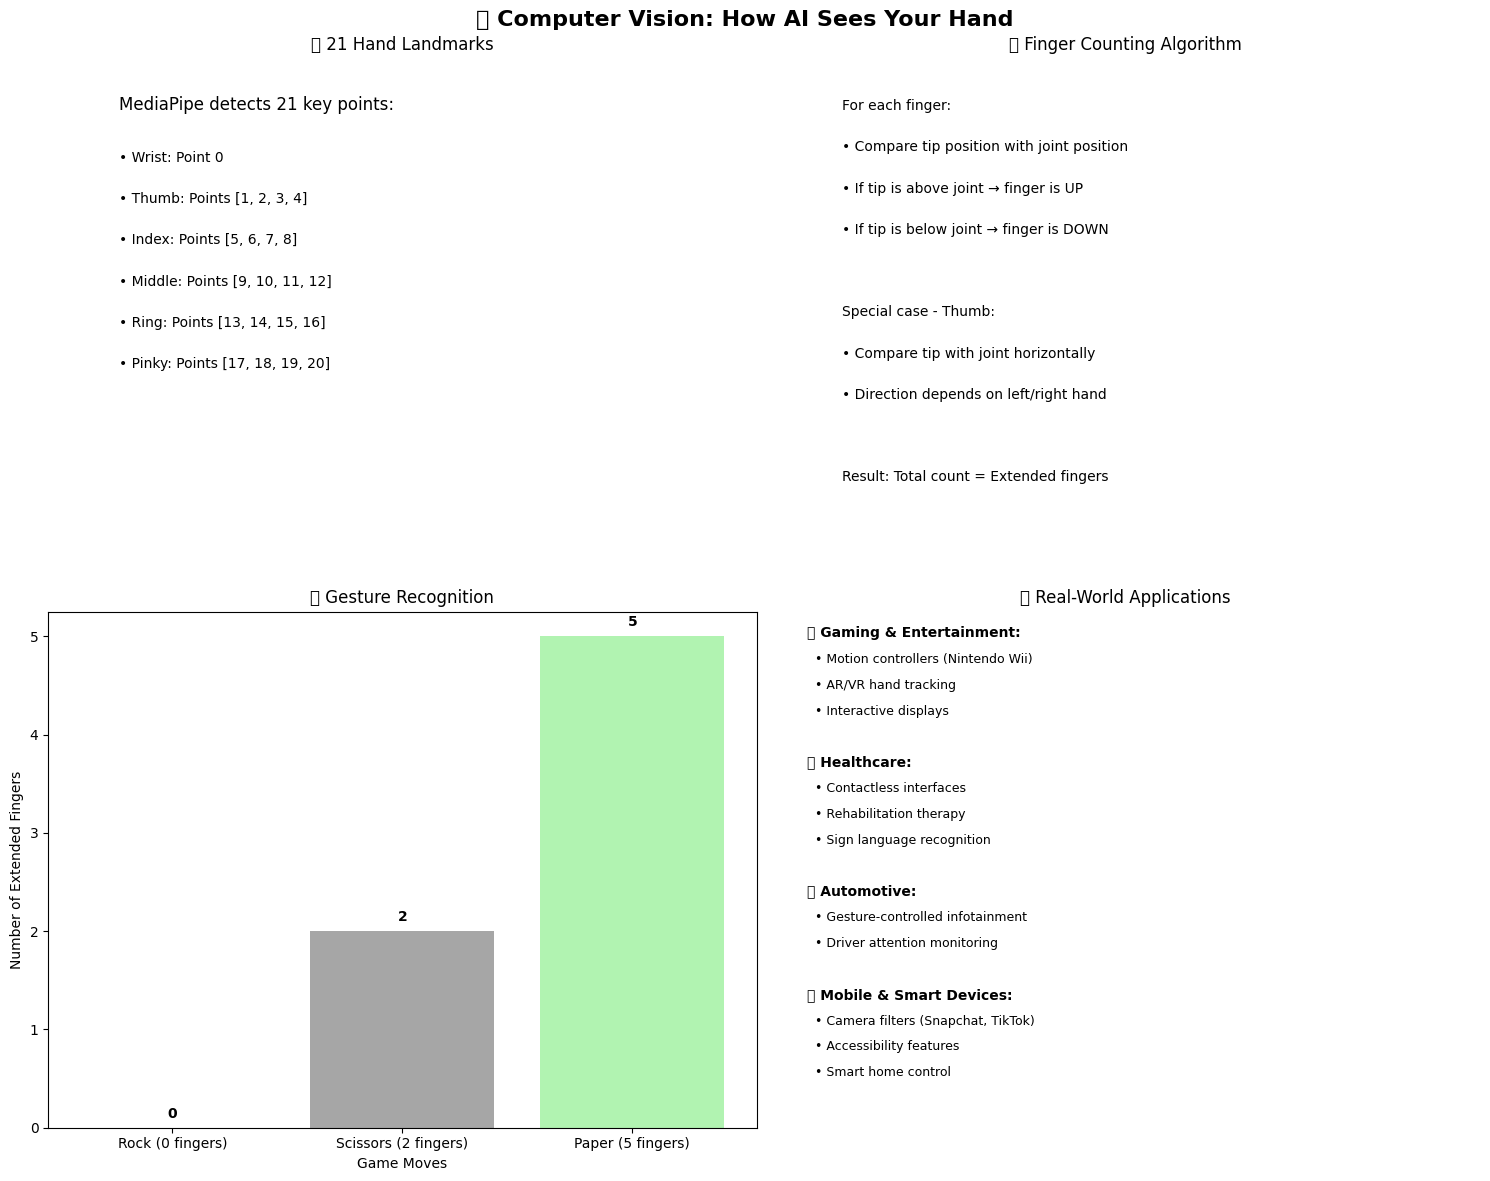

🎯 Key Computer Vision Concepts You Just Learned:
✅ Image Processing - Converting visual data to numbers
✅ Feature Detection - Finding key points in images
✅ Pattern Recognition - Mapping features to meanings
✅ Real-time Processing - Handling video streams
✅ Machine Learning Integration - Using pre-trained AI models

🚀 You've built a complete computer vision application!


In [10]:
# Let's visualize how hand landmarks work
import matplotlib.pyplot as plt

def visualize_hand_landmarks():
    """
    Show what MediaPipe detects on a hand
    """
    # Hand landmark indices (MediaPipe standard)
    landmarks = {
        'Wrist': 0,
        'Thumb': [1, 2, 3, 4],
        'Index': [5, 6, 7, 8],
        'Middle': [9, 10, 11, 12],
        'Ring': [13, 14, 15, 16],
        'Pinky': [17, 18, 19, 20]
    }

    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('🤖 Computer Vision: How AI Sees Your Hand', fontsize=16, fontweight='bold')

    # 1. Hand Landmark Points
    axes[0, 0].set_title('👋 21 Hand Landmarks')
    axes[0, 0].text(0.1, 0.9, "MediaPipe detects 21 key points:", fontsize=12, transform=axes[0, 0].transAxes)

    y_pos = 0.8
    for finger, indices in landmarks.items():
        if finger == 'Wrist':
            axes[0, 0].text(0.1, y_pos, f"• {finger}: Point {indices}", fontsize=10, transform=axes[0, 0].transAxes)
        else:
            axes[0, 0].text(0.1, y_pos, f"• {finger}: Points {indices}", fontsize=10, transform=axes[0, 0].transAxes)
        y_pos -= 0.08

    axes[0, 0].axis('off')

    # 2. Finger Counting Logic
    axes[0, 1].set_title('🔢 Finger Counting Algorithm')
    counting_logic = [
        "For each finger:",
        "• Compare tip position with joint position",
        "• If tip is above joint → finger is UP",
        "• If tip is below joint → finger is DOWN",
        "",
        "Special case - Thumb:",
        "• Compare tip with joint horizontally",
        "• Direction depends on left/right hand",
        "",
        "Result: Total count = Extended fingers"
    ]

    y_pos = 0.9
    for line in counting_logic:
        axes[0, 1].text(0.1, y_pos, line, fontsize=10, transform=axes[0, 1].transAxes)
        y_pos -= 0.08

    axes[0, 1].axis('off')

    # 3. Gesture Mapping
    axes[1, 0].set_title('🎯 Gesture Recognition')
    gestures = ['Rock (0 fingers)', 'Scissors (2 fingers)', 'Paper (5 fingers)']
    colors = ['brown', 'gray', 'lightgreen']
    counts = [0, 2, 5]

    bars = axes[1, 0].bar(gestures, counts, color=colors, alpha=0.7)
    axes[1, 0].set_ylabel('Number of Extended Fingers')
    axes[1, 0].set_xlabel('Game Moves')

    for bar, count in zip(bars, counts):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                       str(count), ha='center', fontweight='bold')

    # 4. Real-world Applications
    axes[1, 1].set_title('🌍 Real-World Applications')
    applications = [
        "🎮 Gaming & Entertainment:",
        "  • Motion controllers (Nintendo Wii)",
        "  • AR/VR hand tracking",
        "  • Interactive displays",
        "",
        "🏥 Healthcare:",
        "  • Contactless interfaces",
        "  • Rehabilitation therapy",
        "  • Sign language recognition",
        "",
        "🚗 Automotive:",
        "  • Gesture-controlled infotainment",
        "  • Driver attention monitoring",
        "",
        "📱 Mobile & Smart Devices:",
        "  • Camera filters (Snapchat, TikTok)",
        "  • Accessibility features",
        "  • Smart home control"
    ]

    y_pos = 0.95
    for app in applications:
        if app.startswith(('🎮', '🏥', '🚗', '📱')):
            axes[1, 1].text(0.05, y_pos, app, fontsize=10, fontweight='bold', transform=axes[1, 1].transAxes)
        else:
            axes[1, 1].text(0.05, y_pos, app, fontsize=9, transform=axes[1, 1].transAxes)
        y_pos -= 0.05

    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Run the visualization
visualize_hand_landmarks()

print("🎯 Key Computer Vision Concepts You Just Learned:")
print("=" * 50)
print("✅ Image Processing - Converting visual data to numbers")
print("✅ Feature Detection - Finding key points in images")
print("✅ Pattern Recognition - Mapping features to meanings")
print("✅ Real-time Processing - Handling video streams")
print("✅ Machine Learning Integration - Using pre-trained AI models")
print("\n🚀 You've built a complete computer vision application!")